In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('ML_dataset_sales_data_sample.csv', encoding='unicode_escape')


In [5]:
print("Information of Dataset:\n")
print(df.info())
print("\nShape of Dataset (rows, columns): ", df.shape)
print("\nColumns: ", df.columns.tolist())
print("\nTotal elements in dataset:", df.size)
print("\nData types:\n", df.dtypes)
print("\nFirst 5 rows:\n", df.head().T)
print("\nLast 5 rows:\n", df.tail().T)
print("\nAny 5 random rows:\n", df.sample(5).T)

Information of Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2     

In [7]:
print("\nStatistical Information of Numerical Columns:\n", df.describe())



Statistical Information of Numerical Columns:
         ORDERNUMBER  QUANTITYORDERED    PRICEEACH  ORDERLINENUMBER  \
count   2823.000000      2823.000000  2823.000000      2823.000000   
mean   10258.725115        35.092809    83.658544         6.466171   
std       92.085478         9.741443    20.174277         4.225841   
min    10100.000000         6.000000    26.880000         1.000000   
25%    10180.000000        27.000000    68.860000         3.000000   
50%    10262.000000        35.000000    95.700000         6.000000   
75%    10333.500000        43.000000   100.000000         9.000000   
max    10425.000000        97.000000   100.000000        18.000000   

              SALES       QTR_ID     MONTH_ID     YEAR_ID         MSRP  
count   2823.000000  2823.000000  2823.000000  2823.00000  2823.000000  
mean    3553.889072     2.717676     7.092455  2003.81509   100.715551  
std     1841.865106     1.203878     3.656633     0.69967    40.187912  
min      482.130000     1.000

In [9]:
to_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATE', 'POSTALCODE', 'PHONE']
df.drop(columns=to_drop, inplace=True, errors='ignore')

In [11]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


In [13]:
snapshot_date = df['ORDERDATE'].max() + dt.timedelta(days=1)

In [17]:
df_RFM = df.groupby('CUSTOMERNAME').agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,  
    'ORDERNUMBER': 'count',                                 
    'SALES': 'sum'                                        
})


In [19]:
df_RFM.rename(columns={
    'ORDERDATE': 'Recency',
    'ORDERNUMBER': 'Frequency',
    'SALES': 'MonetaryValue'
}, inplace=True)

In [21]:
print("\nRFM Table (before clustering):\n", df_RFM.head())



RFM Table (before clustering):
                          Recency  Frequency  MonetaryValue
CUSTOMERNAME                                              
AV Stores, Co.               196         51      157807.81
Alpha Cognac                  65         20       70488.44
Amica Models & Co.           265         26       94117.26
Anna's Decorations, Ltd       84         46      153996.13
Atelier graphique            188          7       24179.96


In [23]:
data = df_RFM[['Recency', 'Frequency', 'MonetaryValue']]


In [25]:
data_log = np.log1p(data)


In [27]:
scaler = StandardScaler()
data_normalized = pd.DataFrame(
    scaler.fit_transform(data_log),
    index=data_log.index,
    columns=data_log.columns
)

In [29]:
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_

C:\Users\VP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\VP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\VP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\VP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

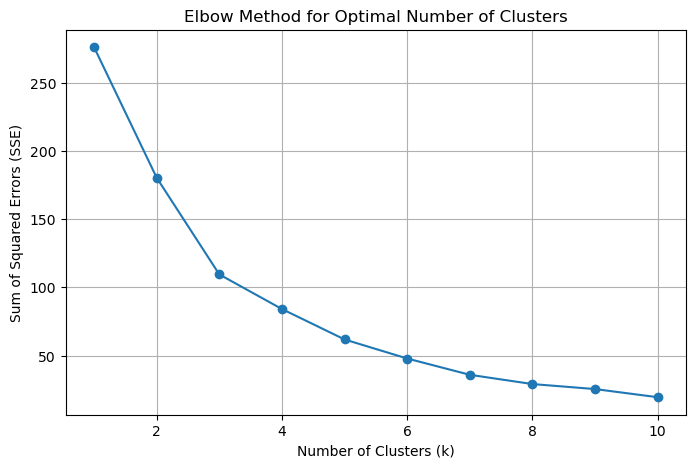

In [31]:
plt.figure(figsize=(8, 5))
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.grid(True)
plt.show()

In [33]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_normalized)

C:\Users\VP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [35]:
df_RFM['Cluster'] = kmeans.labels_


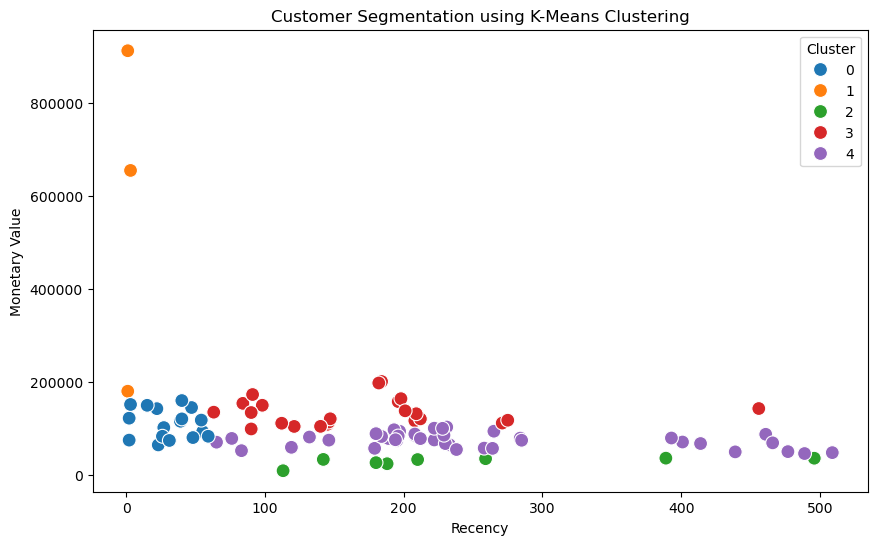

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_RFM, x='Recency', y='MonetaryValue',
    hue='Cluster', palette='tab10', s=100
)
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.show()

In [39]:
print("\nClustered RFM Table:\n", df_RFM.head())



Clustered RFM Table:
                          Recency  Frequency  MonetaryValue  Cluster
CUSTOMERNAME                                                       
AV Stores, Co.               196         51      157807.81        3
Alpha Cognac                  65         20       70488.44        4
Amica Models & Co.           265         26       94117.26        4
Anna's Decorations, Ltd       84         46      153996.13        3
Atelier graphique            188          7       24179.96        2
